In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**1. CHECK DATA TYPES**

There are 5 categorical variables, 2 numeric variables

In [4]:
df.isna().sum()
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**2.CHECK THE NUMBER OF UNIQUE VALUE FROM EACH COLUMN**

In [5]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3. CHECK STATISTICS OF NUMERIC VARIABLES**

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- all the means from 3 scores are close to each other (in the range of 66 to 69)
- standard deviation: 14-15

**4. EXPLORE DATA **

In [7]:

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [8]:
cols = []
for i in categorical_features:
    l = df[i].unique()
    print(f'categories in {i} variable: {l}')

categories in gender variable: ['female' 'male']
categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable: ['standard' 'free/reduced']
categories in test_preparation_course variable: ['none' 'completed']


In [9]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


**VISUALIZE AVERAGE SCORE**

<function matplotlib.pyplot.show(close=None, block=None)>

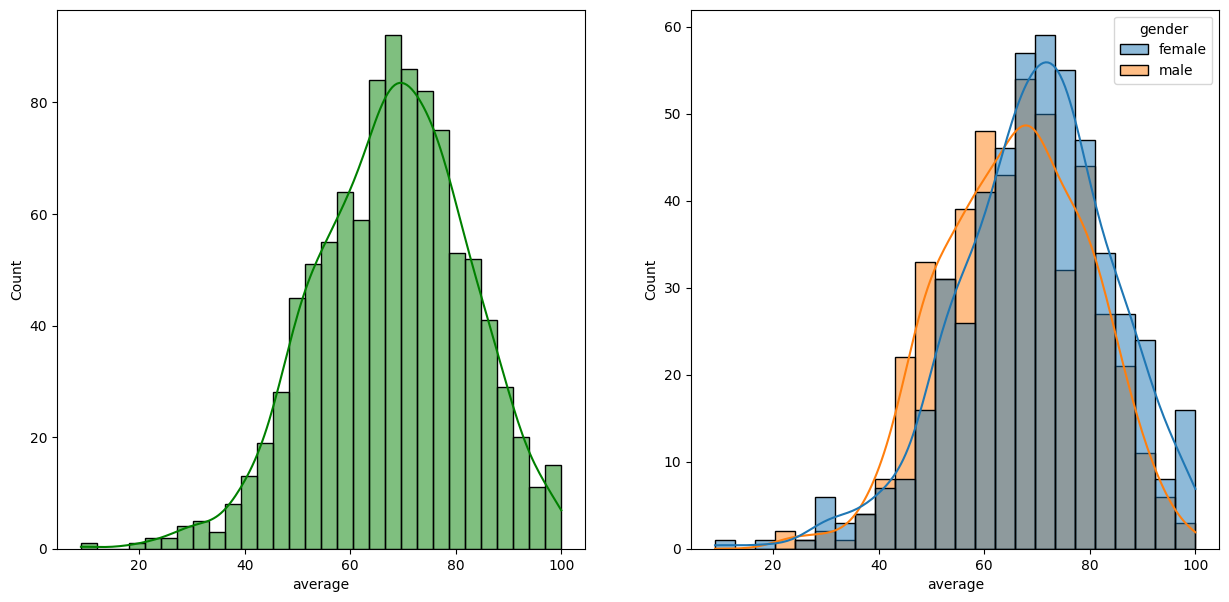

In [10]:
# draw 2 empty 
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)

sn.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)

sn.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show

=> female students perform better than male students

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\3874844293.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\3874844293.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\3874844293.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


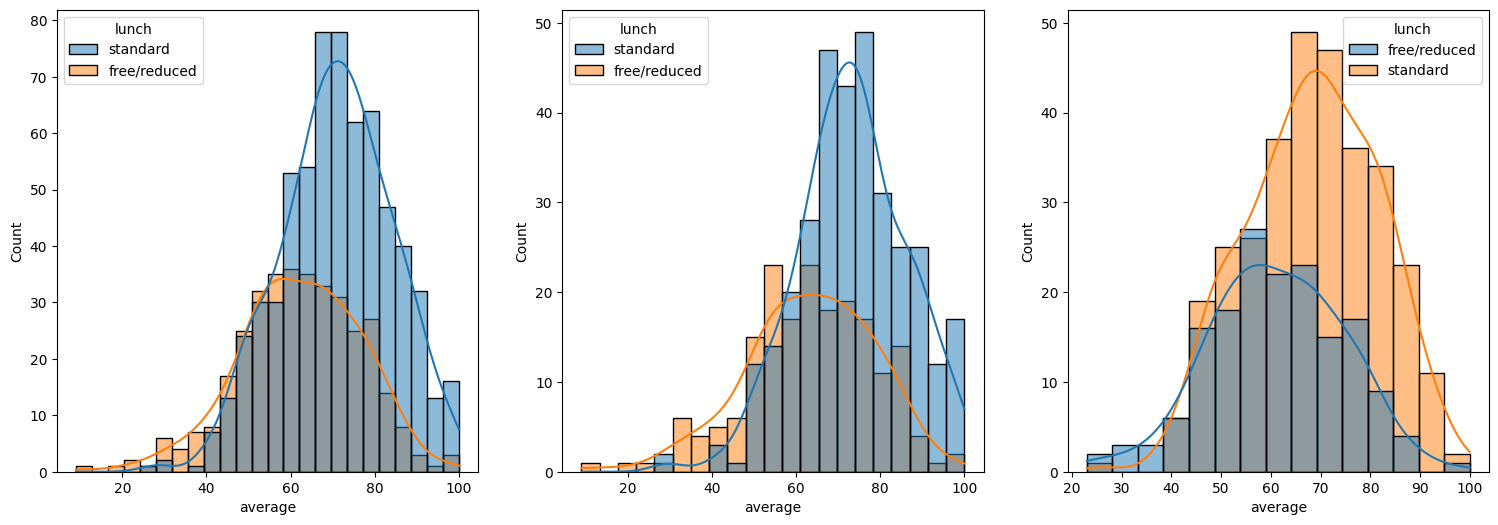

In [11]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sn.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sn.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sn.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

=> standard lunch helps perform well in exams, in both male and female

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\461967586.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\461967586.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\461967586.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


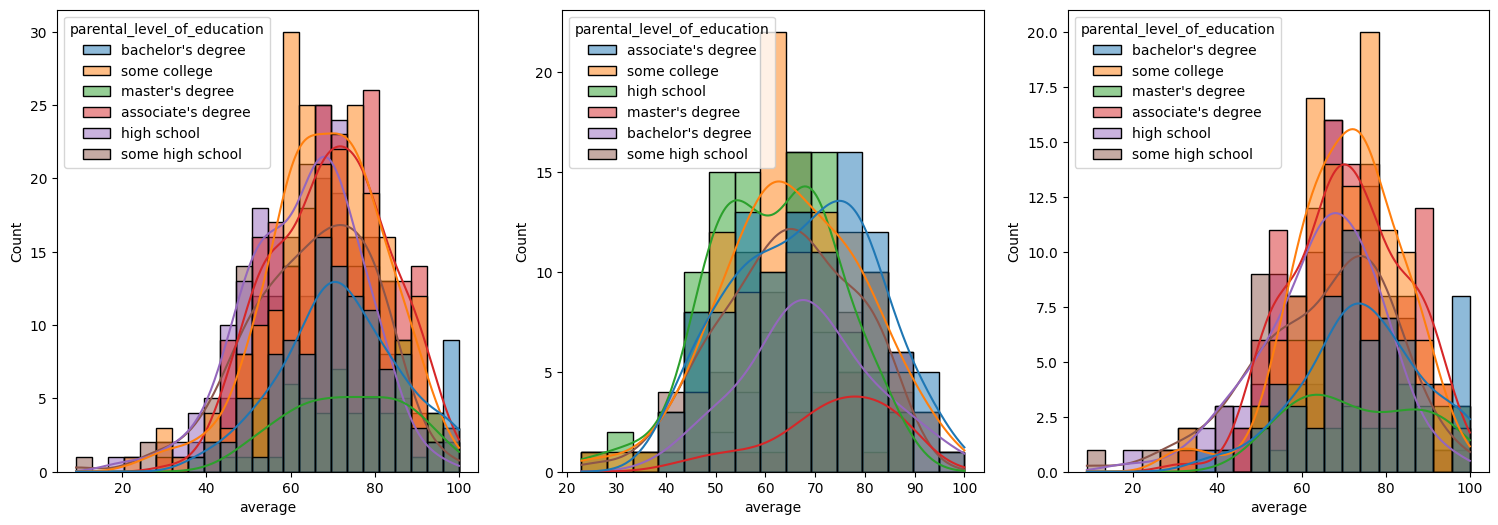

In [12]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sn.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sn.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sn.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

- in general, parent's education dont help student perform well in exam
- Second plot show that parents with associate or master degree having male children perform better
- Third plot show that there is no significant effect

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\136711440.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\136711440.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\136711440.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


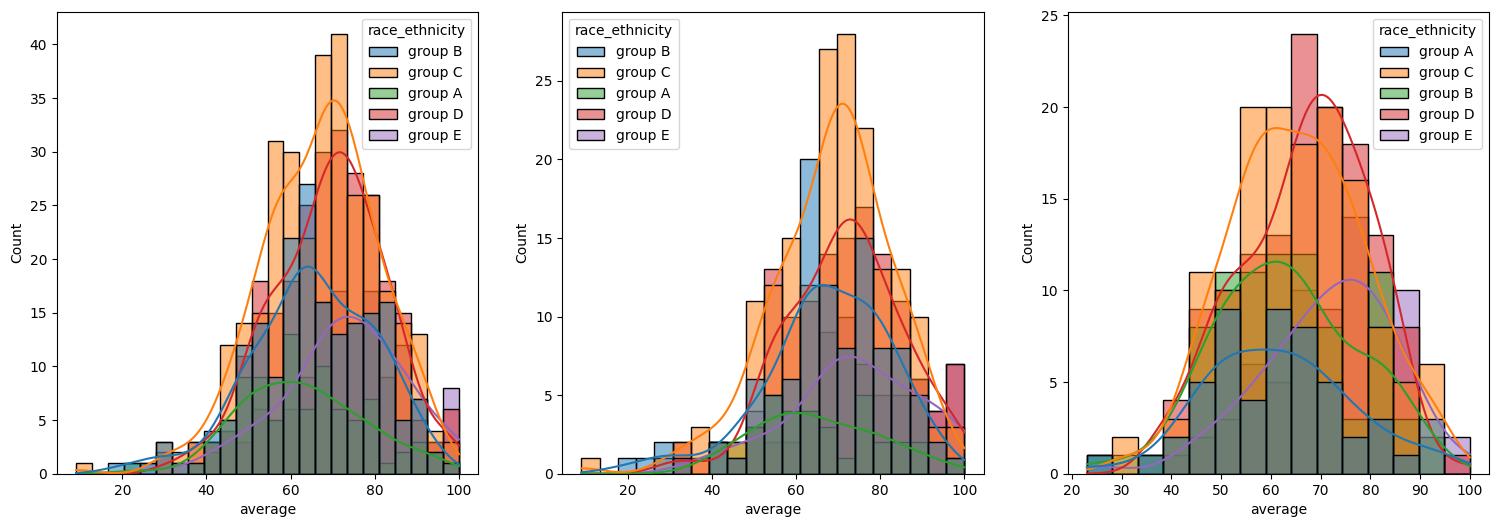

In [13]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sn.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sn.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sn.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- Group A and B dont perform as well as the others in both genders
- Group E seems to perform better in both genders

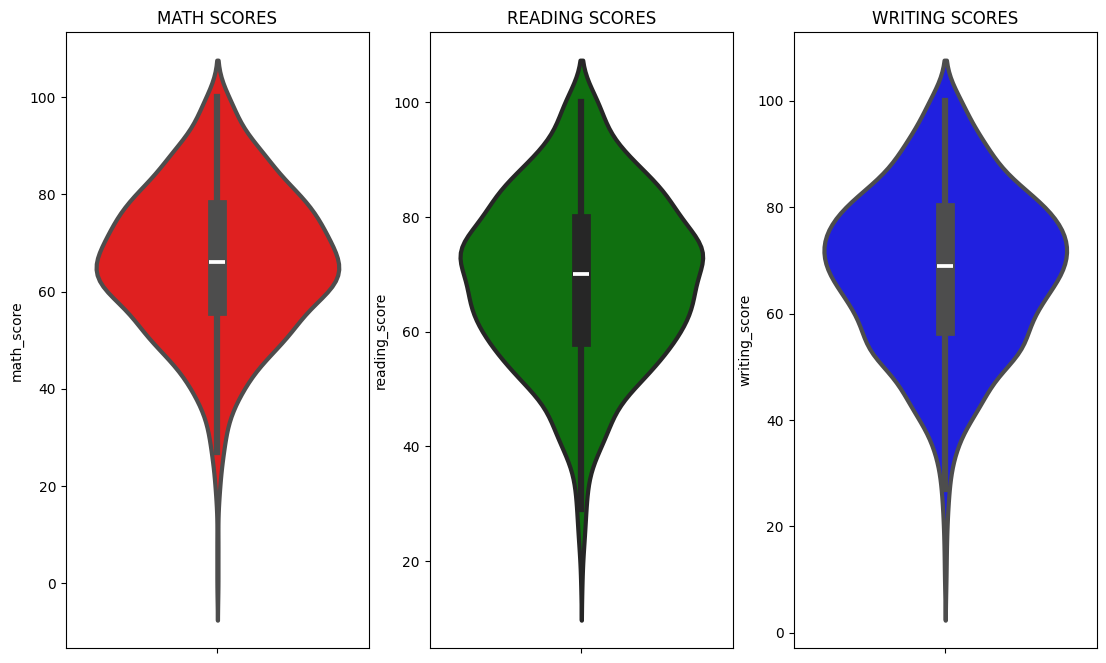

In [14]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sn.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sn.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sn.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

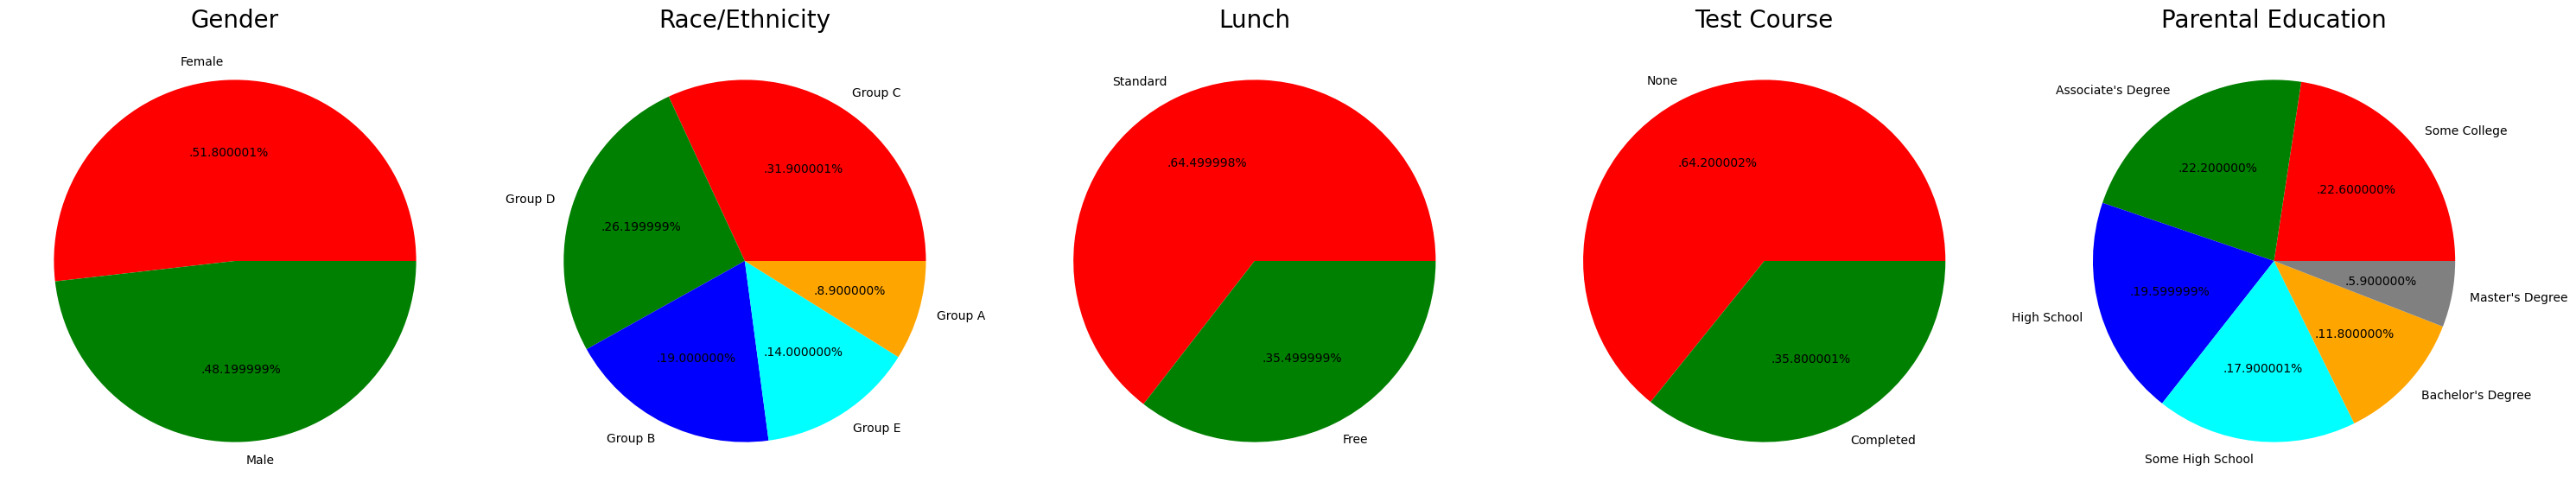

In [15]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

The number of male and female students is almost equal
The number of students are biggest in group C
The number of standard lunch student is major
most of the students dont enroll for preparation
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

**FEATURE WISE VISUALIZATION**

4.1 GENDER COLUMN
- How is the distribution of gender
- is gender has impact on students' performance ?

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\1642670384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


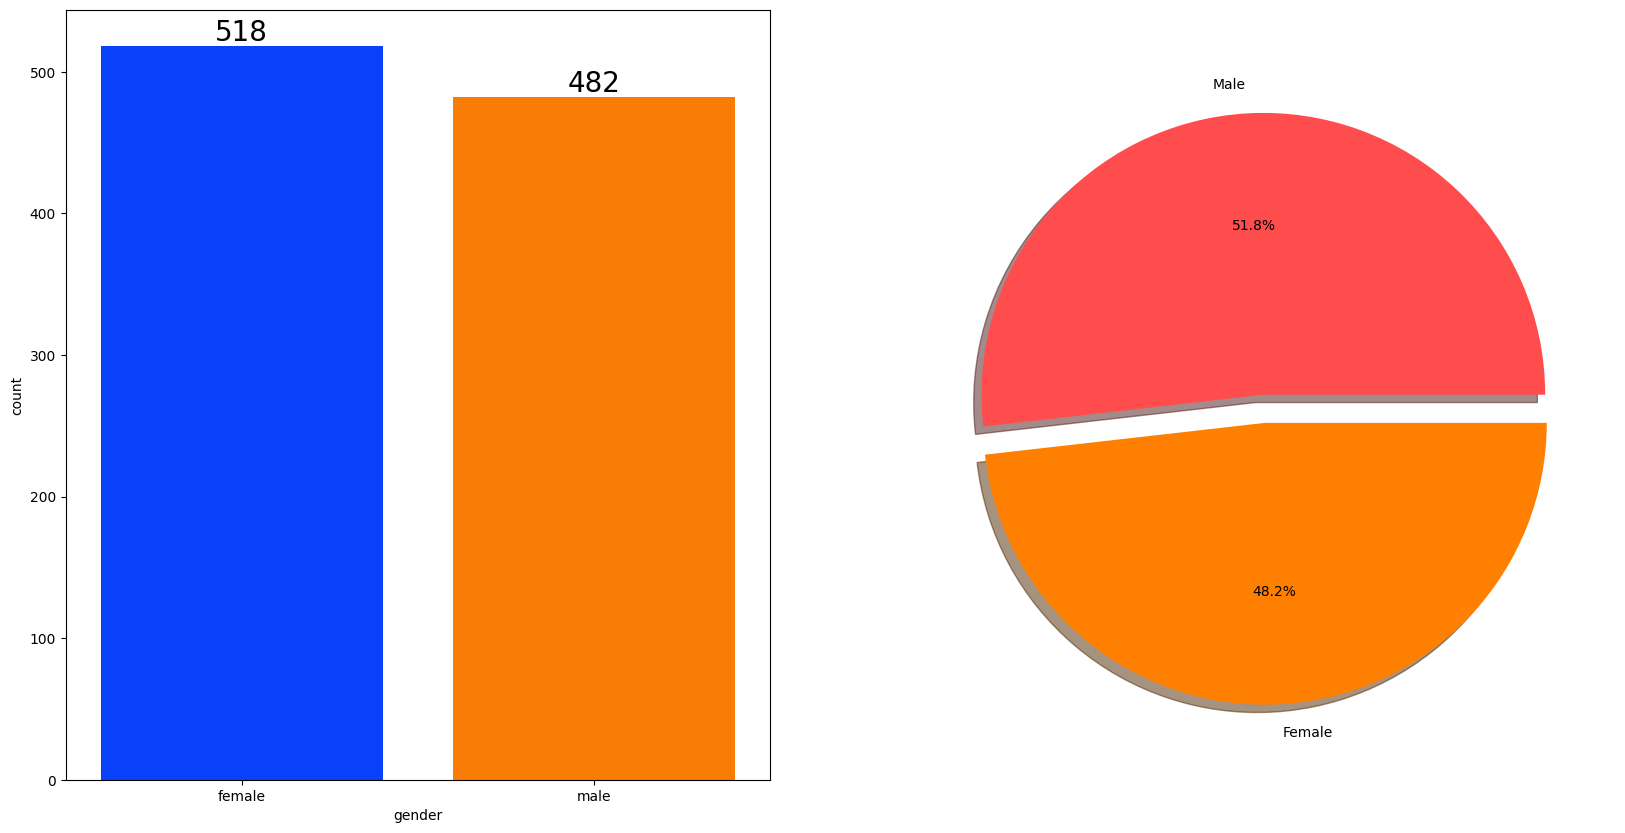

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sn.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [30]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score','average']].mean()

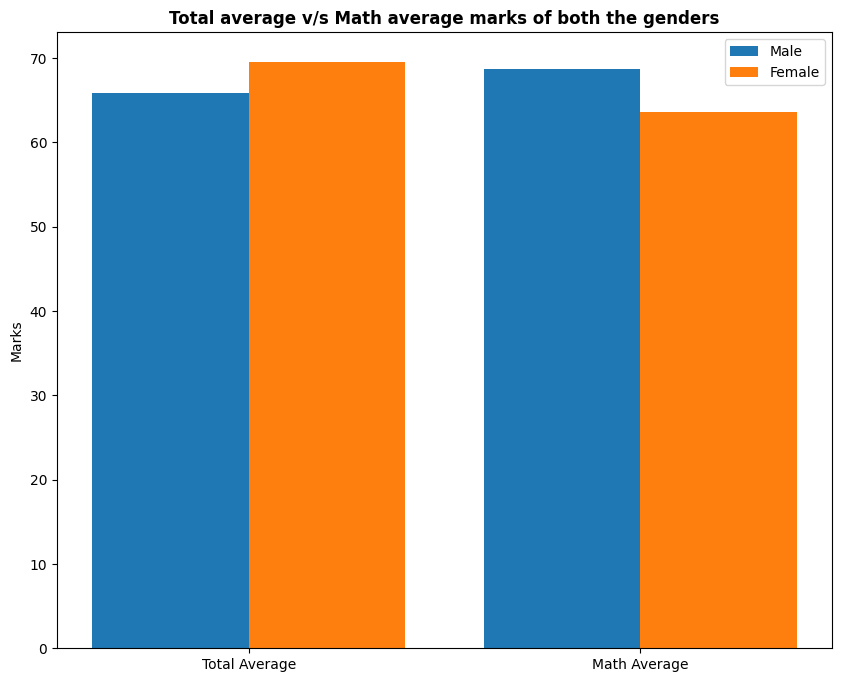

In [35]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

On an average females have a better overall score than men.
whereas males have scored higher in Maths.

**Race/ethnicity**
- how is group distribution ?
- do race/eth have impact on students performance?

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\1686153420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(


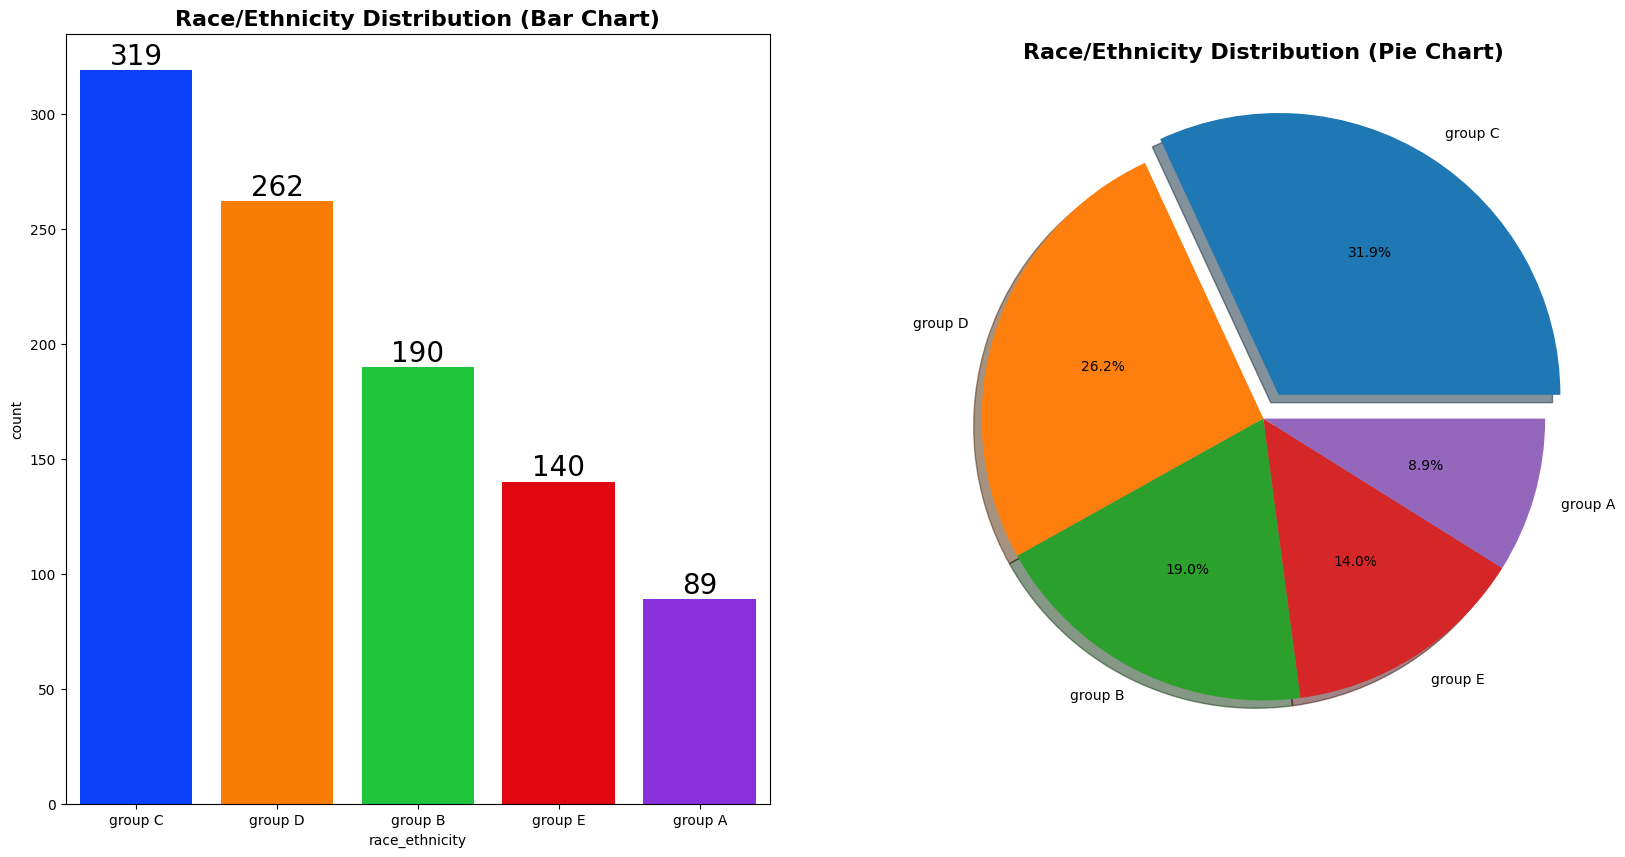

In [39]:

# Tạo figure với 2 biểu đồ cạnh nhau
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Đếm số lượng và sắp xếp giảm dần
race_counts = df['race_ethnicity'].value_counts()

# Bar chart (countplot)
sn.countplot(
    x='race_ethnicity',
    data=df,
    palette='bright',
    ax=ax[0],
    saturation=0.95,
    order=race_counts.index   # 👈 sắp xếp theo value_counts
)

# Hiển thị số trên cột
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

ax[0].set_title("Race/Ethnicity Distribution (Bar Chart)", fontsize=16, fontweight='bold')

# Pie chart
ax[1].pie(
    x=race_counts.values,
    labels=race_counts.index,
    explode=[0.1] + [0]*(len(race_counts)-1), # nổ phần tử đầu tiên
    autopct='%1.1f%%',
    shadow=True
)

ax[1].set_title("Race/Ethnicity Distribution (Pie Chart)", fontsize=16, fontweight='bold')

plt.show()


Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\3467688909.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\3467688909.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\3467688909.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


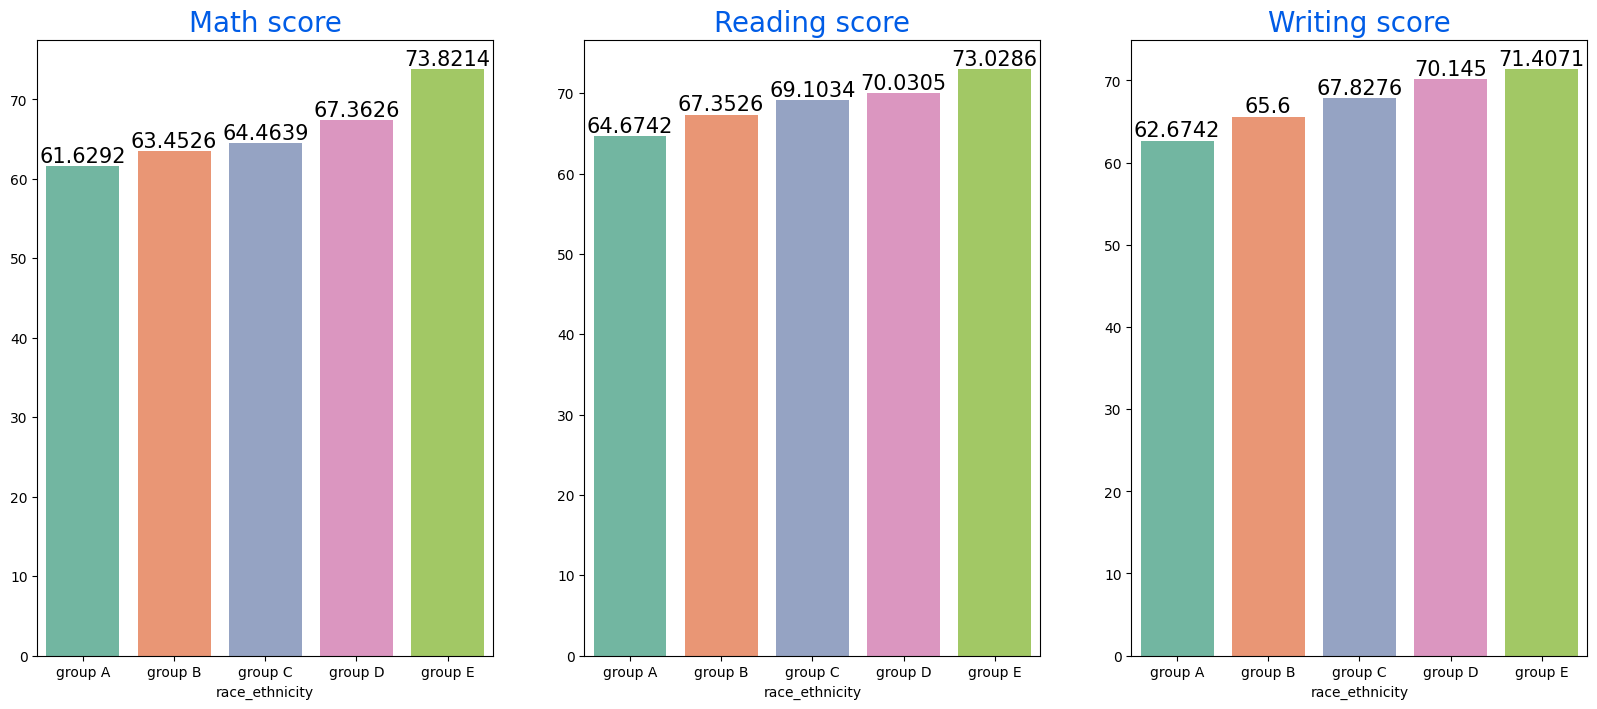

In [41]:

# Gom nhóm và tính trung bình
Group_data2 = df.groupby('race_ethnicity').mean(numeric_only=True)

# Lấy danh sách các nhóm
groups = Group_data2.index

# Tạo một palette cố định (vd: bright, hoặc bạn tự định nghĩa màu)
palette = sn.color_palette("Set2", n_colors=len(groups))

# Tạo dict mapping group -> color
color_map = dict(zip(groups, palette))

# Vẽ 3 biểu đồ
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score
sn.barplot(
    x=groups,
    y=Group_data2['math_score'].values,
    palette=color_map,  # dùng color map
    ax=ax[0]
)
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading score
sn.barplot(
    x=groups,
    y=Group_data2['reading_score'].values,
    palette=color_map,  # giữ màu giống
    ax=ax[1]
)
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing score
sn.barplot(
    x=groups,
    y=Group_data2['writing_score'].values,
    palette=color_map,  # giữ màu giống
    ax=ax[2]
)
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\458122773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df['parental_level_of_education'], palette = 'Blues')


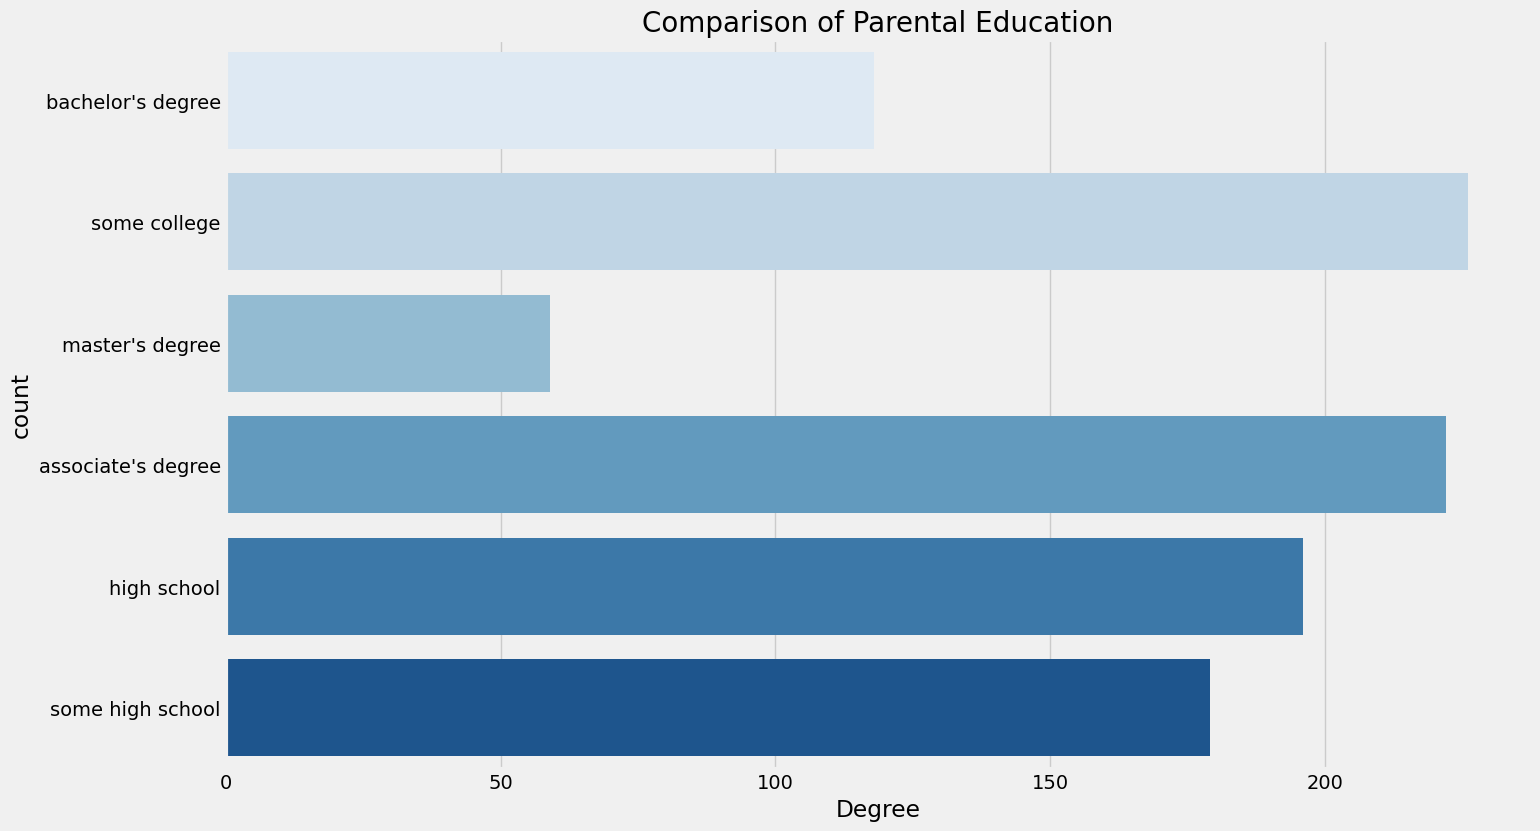

In [42]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sn.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

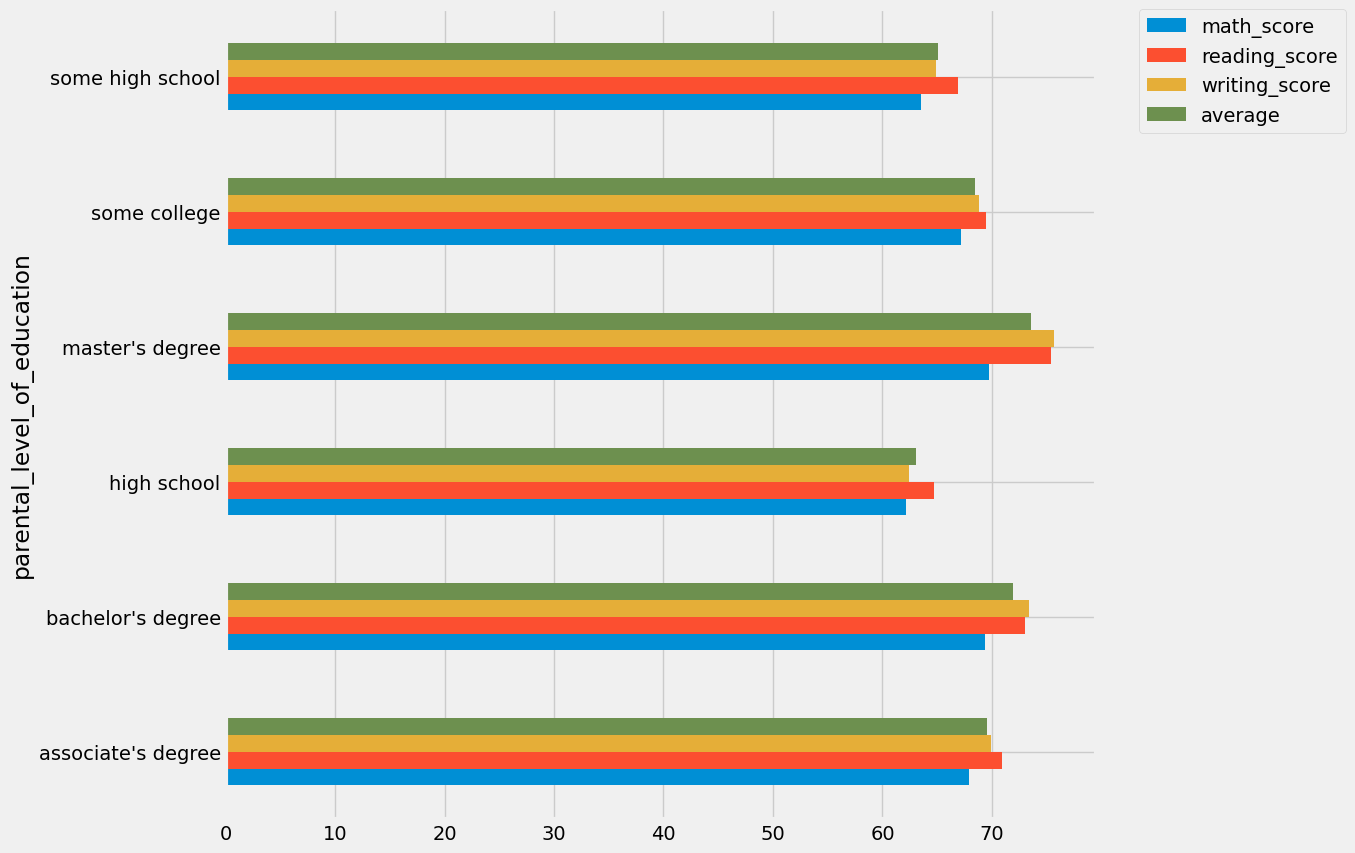

In [44]:
numeric_cols = ['math_score', 'reading_score', 'writing_score','average']
df.groupby('parental_level_of_education')[numeric_cols].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\2533461532.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\Ruanw\AppData\Local\Temp\ipykernel_11772\2533461532.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df['lunch'], palette = 'PuBu')


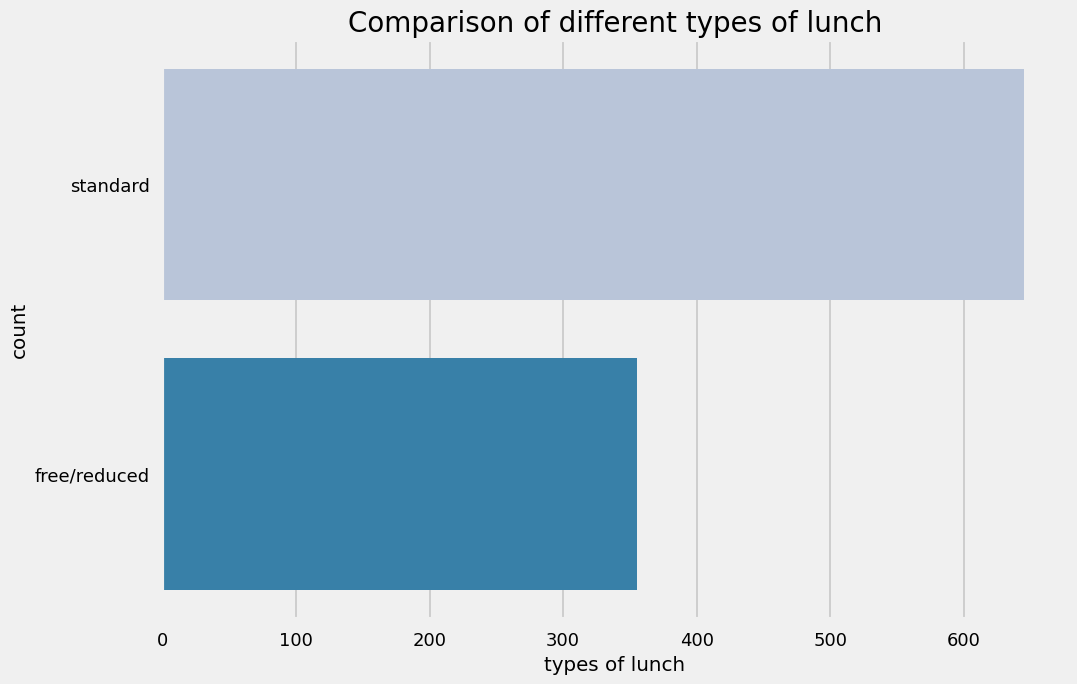

In [46]:
# LUNCH
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sn.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

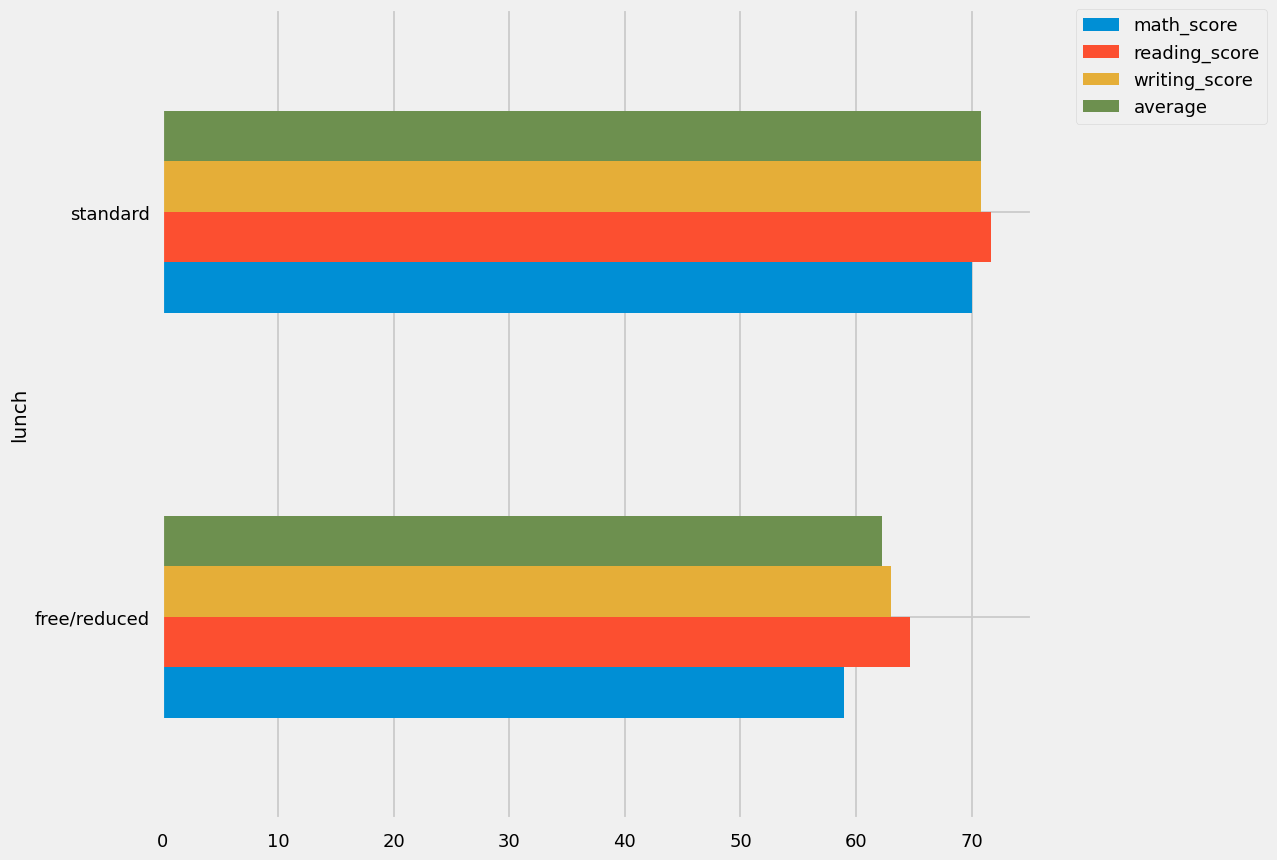

In [47]:
numeric_cols = ['math_score', 'reading_score', 'writing_score','average']
df.groupby('lunch')[numeric_cols].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

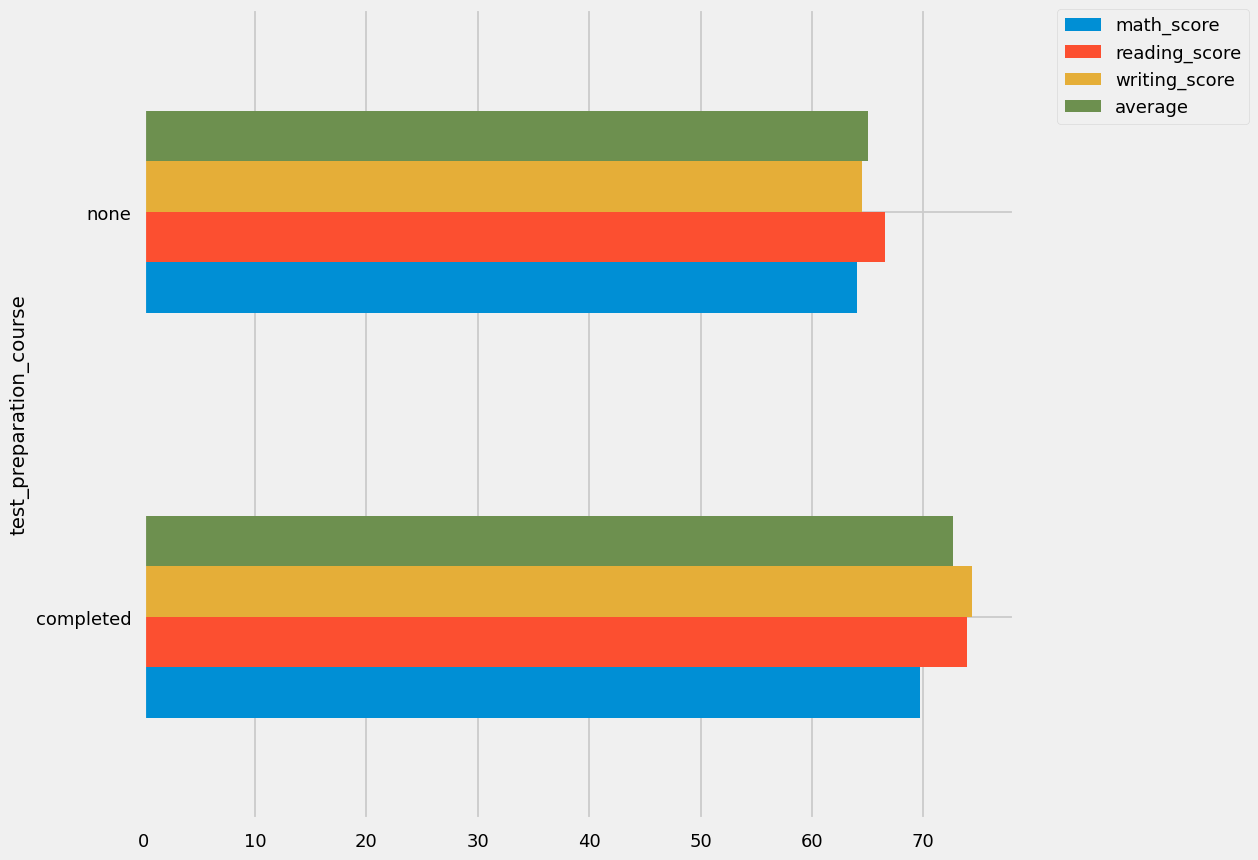

In [49]:
numeric_cols = ['math_score', 'reading_score', 'writing_score','average']
df.groupby('test_preparation_course')[numeric_cols].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**outliers**

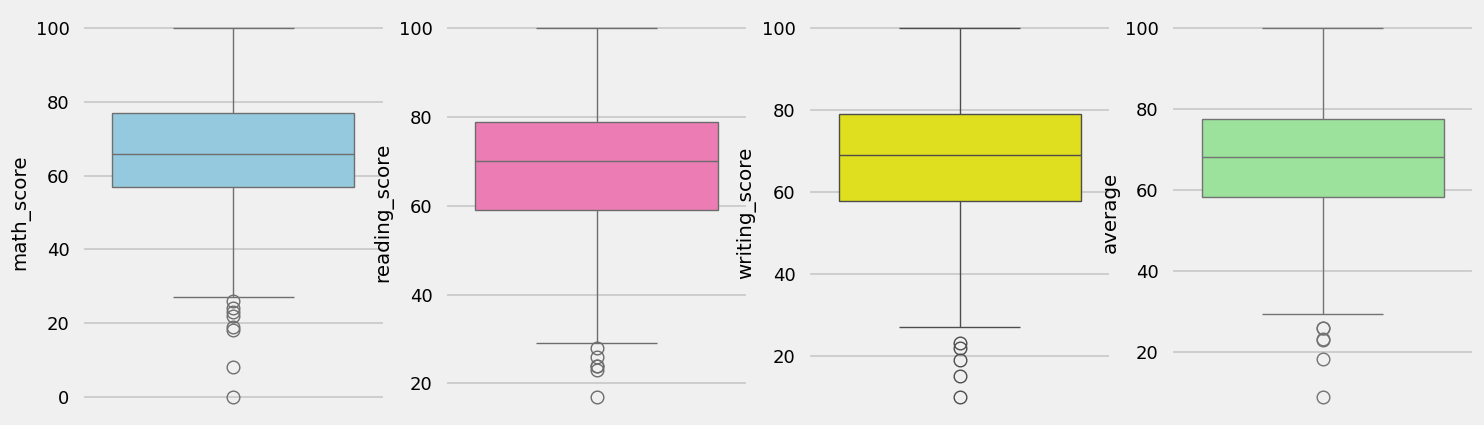

In [50]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sn.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sn.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sn.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sn.boxplot(df['average'],color='lightgreen')
plt.show()

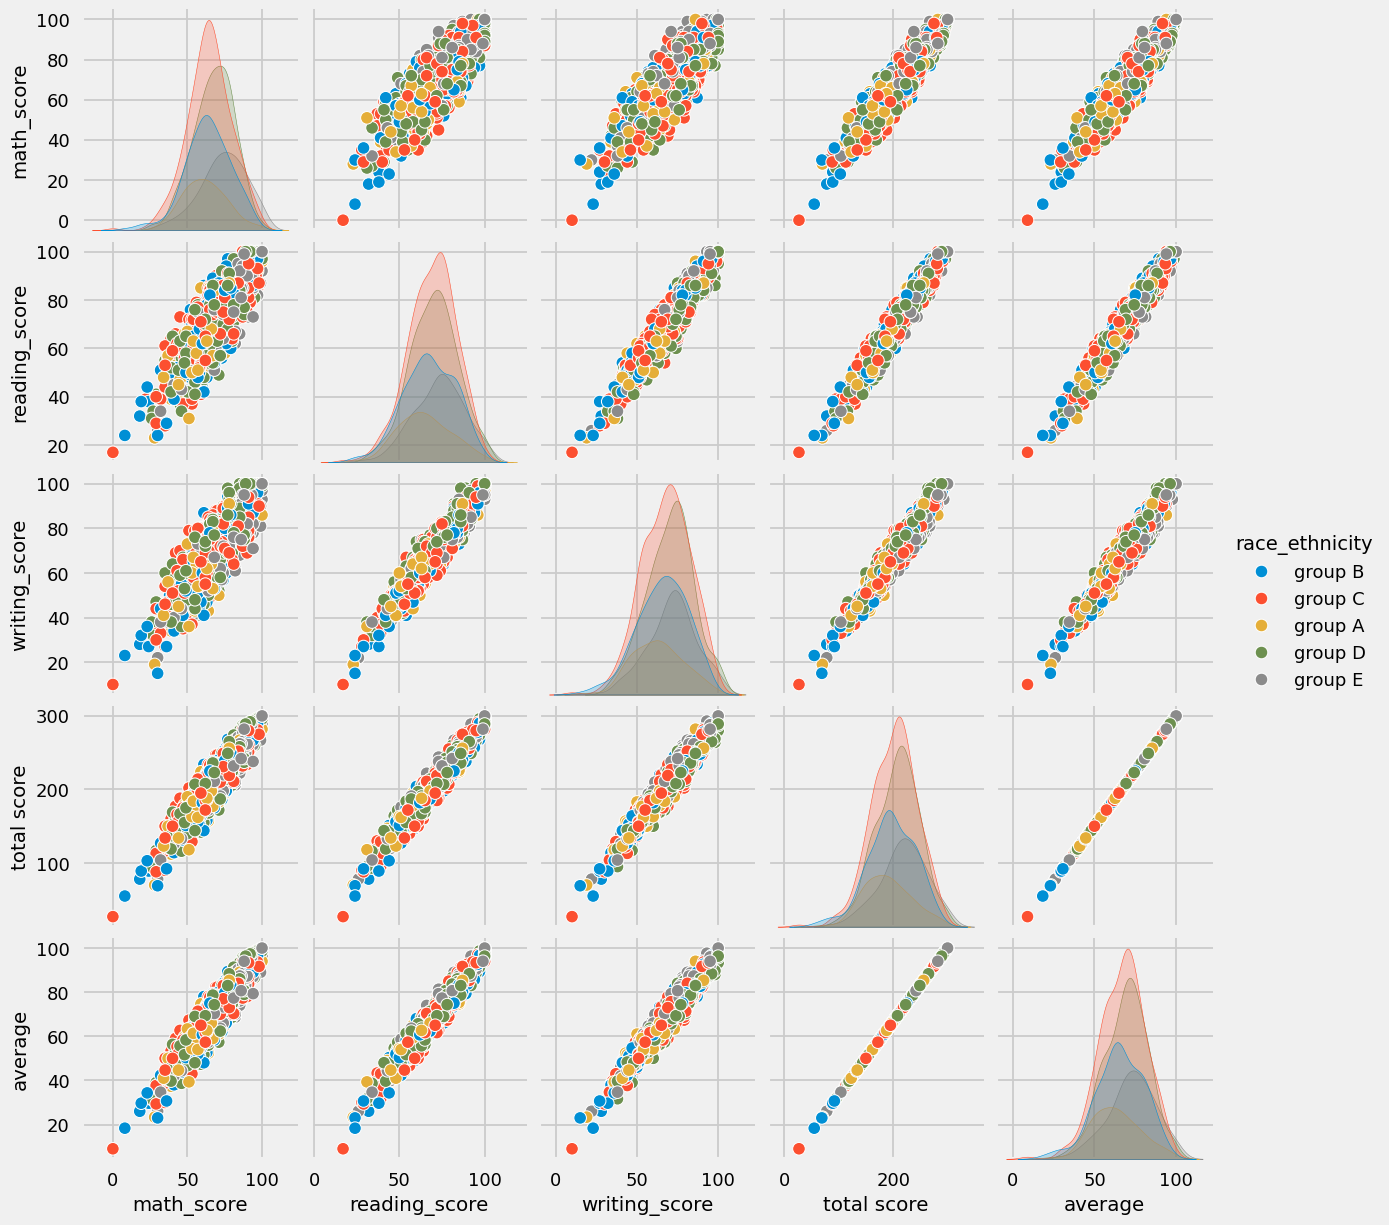

In [52]:

sn.pairplot(df,hue = 'race_ethnicity')
plt.show()

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.